<a href="https://colab.research.google.com/github/DhirajBembade/Capstone-Bangalore-Restaurants_Model-Deployment/blob/main/Zomato%20Restaurant%20Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORT THE NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **#MOUNT DRIVE-**

In [2]:
#from google.colab import drive
#rive.mount('/content/drive')

#**#LOAD DATASET-**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/zomato.csv')

# **#BASIC INFO ABOUT DATASET-**

In [4]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
data.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
data.shape

(51717, 17)

In [8]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

#**#Delating Unnecessary Columns-**

In [9]:
df=data.drop(['url','phone'],axis=1)

# **#Checking Duplicate Values-**

In [10]:
df.duplicated().sum()

43

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

#**#Null Values-**

In [13]:
df.isnull().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7767
votes                              0
location                          21
rest_type                        227
dish_liked                     28047
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [14]:
df.dropna(how='any', inplace=True)
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [15]:
df.shape

(23395, 15)

#**#Renaming Columns-**

In [16]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [17]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city' })
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

#**#EDA-**

In [18]:
#1]
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [19]:
# Replacing the "," with nothing and converting the result into float

df['cost'] = df['cost'].apply(lambda x: x.replace(',',''))
df['cost'] = df['cost'].astype('float') # 

In [20]:
df['cost'].dtype

dtype('float64')

In [21]:
#2]
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [22]:
# Getting rid of 'NEW'
df = df.loc[df.rate!='NEW']   

In [23]:
# Removing '/5' from rate
df['rate'] = df['rate'].apply(lambda x:x.replace('/5',''))

In [24]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

#**#Visualization-**

* ## **Most Famous restaurants chains in Bangaluru-**

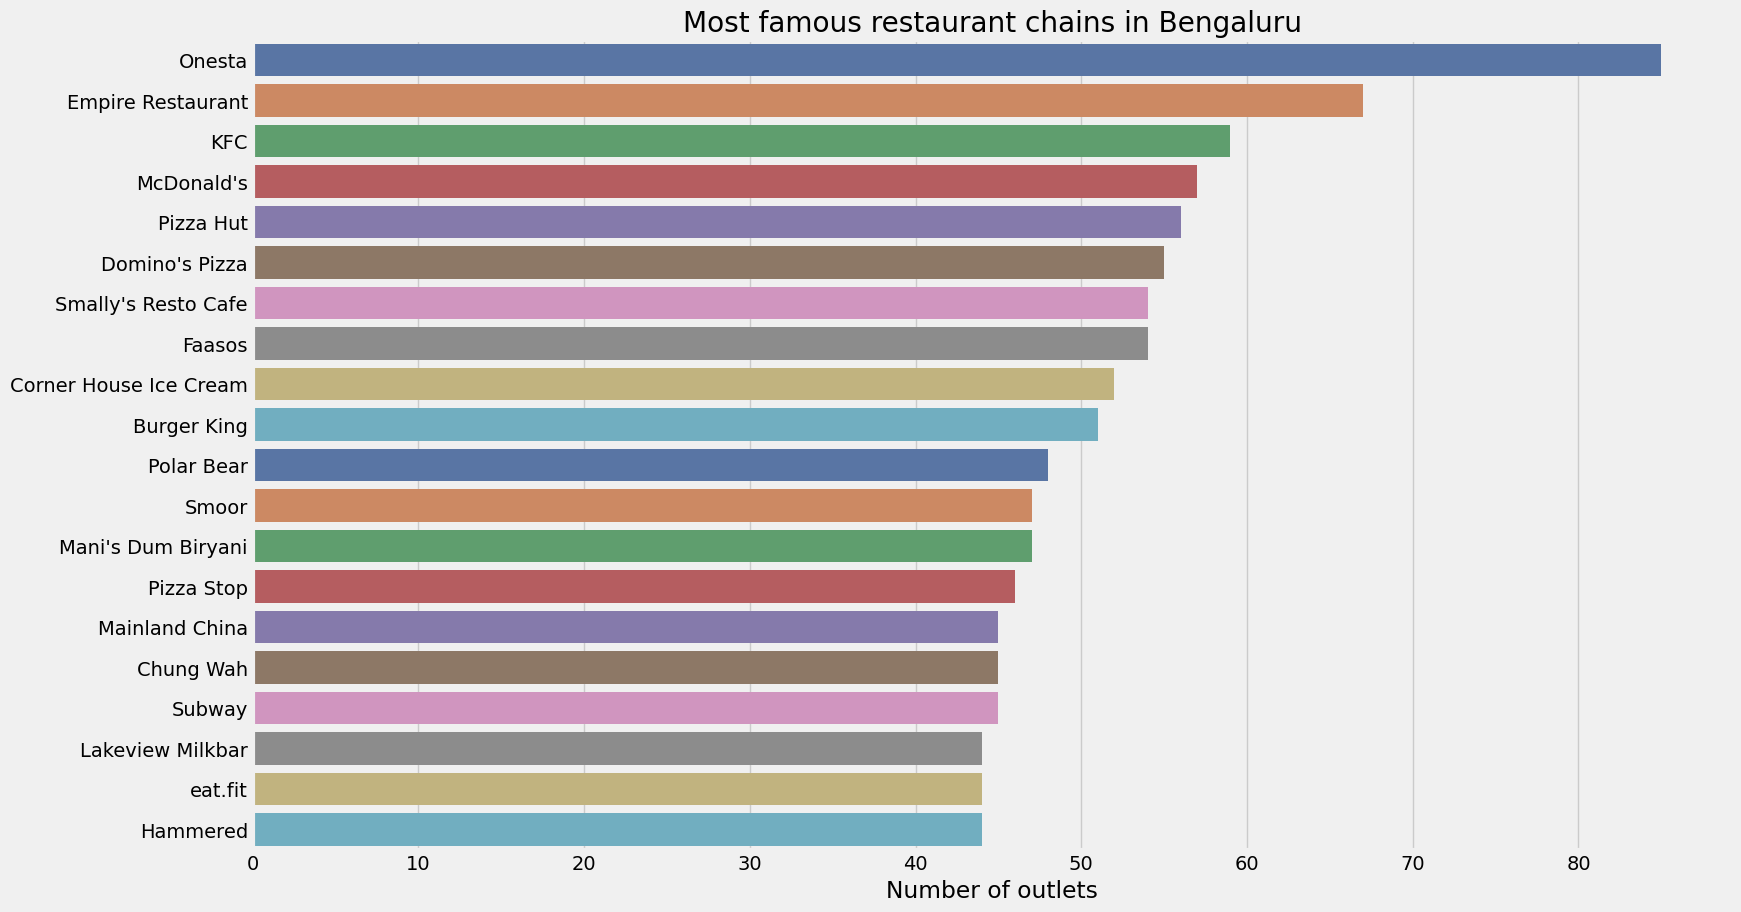

In [25]:
plt.figure(figsize=(17,10))
chains = df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title('Most famous restaurant chains in Bengaluru')
plt.xlabel('Number of outlets')
plt.show()

* ## **Whether restaurants offer Table Booking or Not-**

In [26]:
# Whether restaurants offer Table Booking or Not

x = df['book_table'].value_counts()
colors = ['#800080', '#0000A0']

trace = go.Pie(labels=x.index, values=x, textinfo='value',
               marker= dict(colors=colors,
                            line=dict(color='#001000', width=2)))
layout=go.Layout(title='Table Booking', width=600, height=600)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

👉 Most of the restaurants do not offer table booking.
 

* ## **Wheather restaurants deliver online or not-**

In [27]:
df['online_order'].value_counts()

Yes    16378
No      6870
Name: online_order, dtype: int64

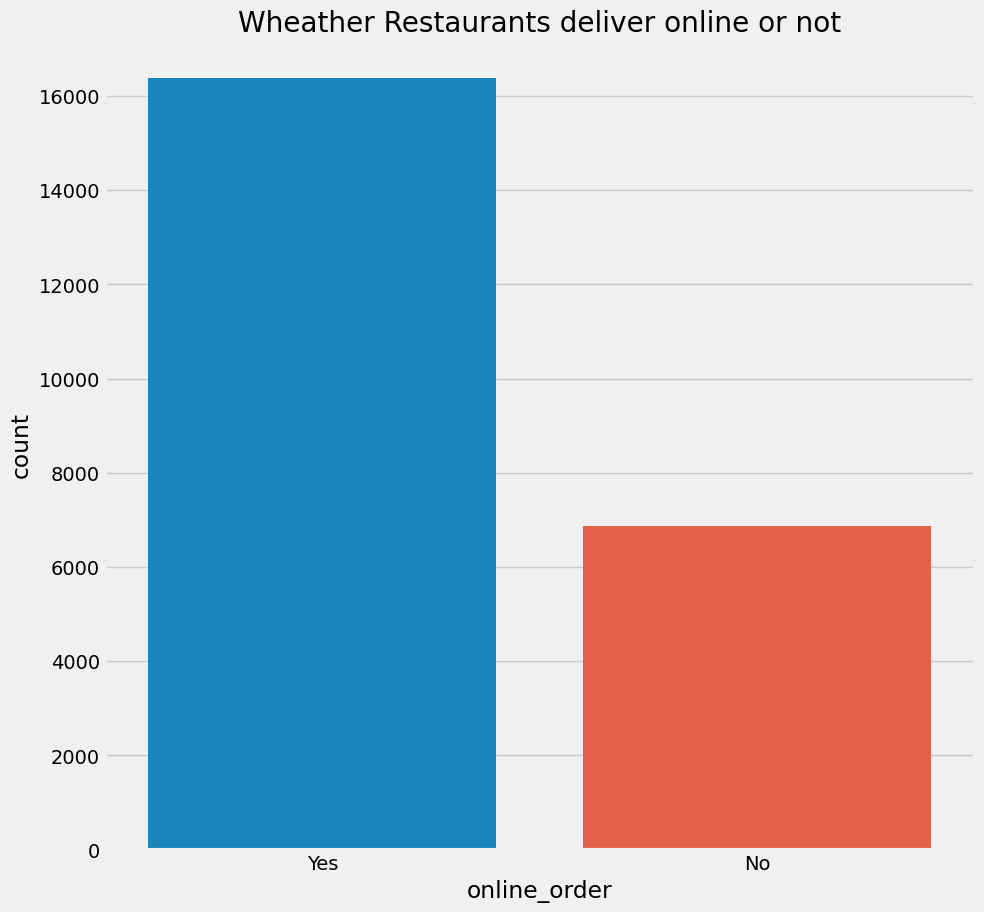

In [28]:
# Restaurants delivering online or not.
sns.countplot(x=df['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Wheather Restaurants deliver online or not')
plt.show()

👉 Most of the restaurants offer option for online order and delivery.

* ## **Rating Distributions-**

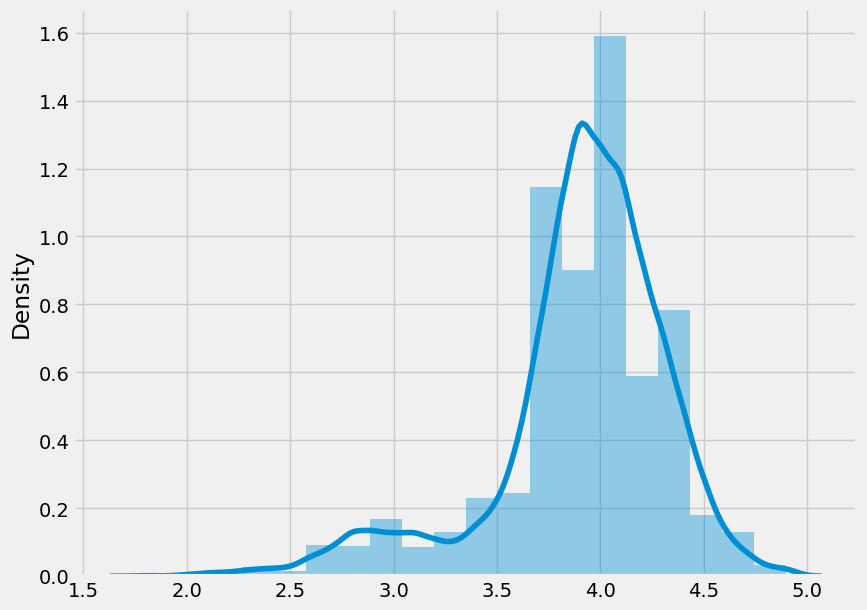

In [29]:
# How ratings are distributed
plt.figure(figsize=(9,7))
sns.distplot(x=df['rate'],bins=20)
plt.show()

👉 **Insights**-Most of the ratings are within 3.5 and 4.5.

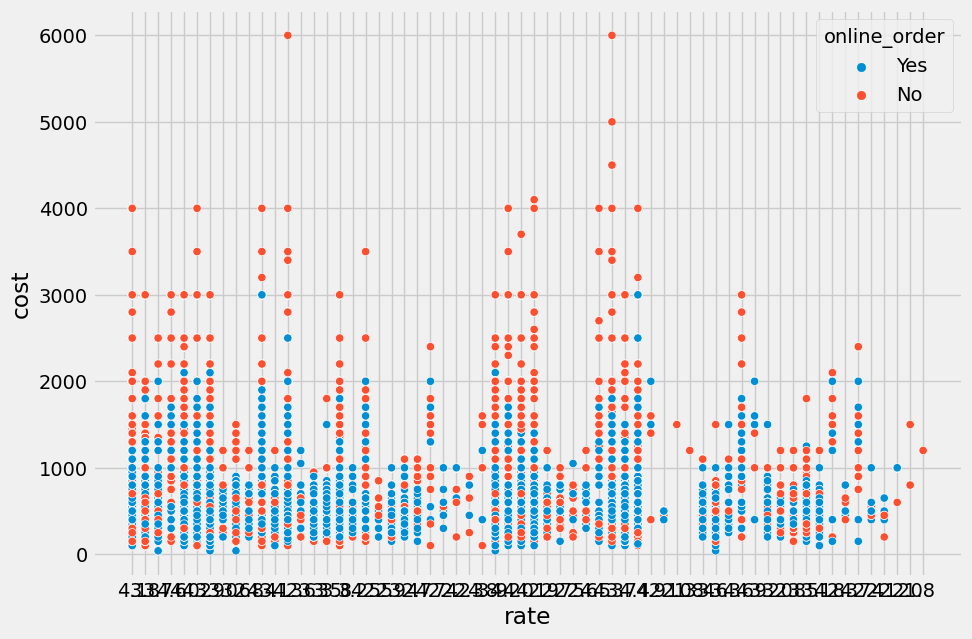

In [30]:
#distribution of the cost Vs ratings in parallel with online order
plt.figure(figsize=(10,7))
sns.scatterplot(x='rate', y='cost', hue= 'online_order', data=df)
plt.show()

#**#Count of ratings as between '1 and 2','2 and 3','3 and 4','4 and 5'**

In [31]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [32]:
df['rate'].min()

'1.8'

In [33]:
df['rate'].max()

'4.9 '

In [34]:
df['rate'] = df['rate'].astype('float')

In [35]:
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [36]:
((df['rate']>=2) & (df['rate']<3)).sum()

1179

In [37]:
((df['rate']>=3) & (df['rate']<4)).sum()

10153

In [38]:
(df['rate']>=4).sum()

11911

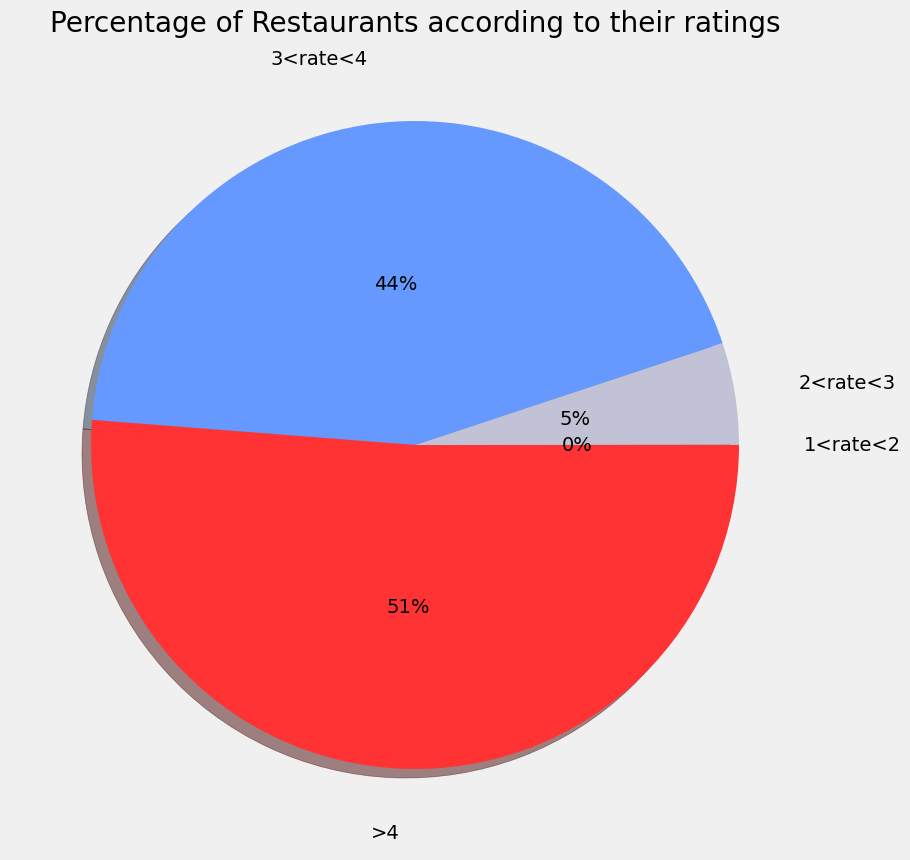

In [39]:
#Plotting count

slices = [((df['rate']>=1) & (df['rate']<2)).sum(),
          ((df['rate']>=2) & (df['rate']<3)).sum(),
          ((df['rate']>=3) & (df['rate']<4)).sum(),
          (df['rate']>=4).sum()
          ]

labels = ['1<rate<2','2<rate<3','3<rate<4','>4']
colors = ['#ff3333', '#c2c2d6', '#6699ff']
plt.pie(slices, colors=colors , labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2, shadow=True) 
fig = plt.gcf()
plt.title('Percentage of Restaurants according to their ratings')

fig.set_size_inches(10,10)
plt.show()


* ## **Service Type-**

Text(0.5, 1.0, 'Type of service')

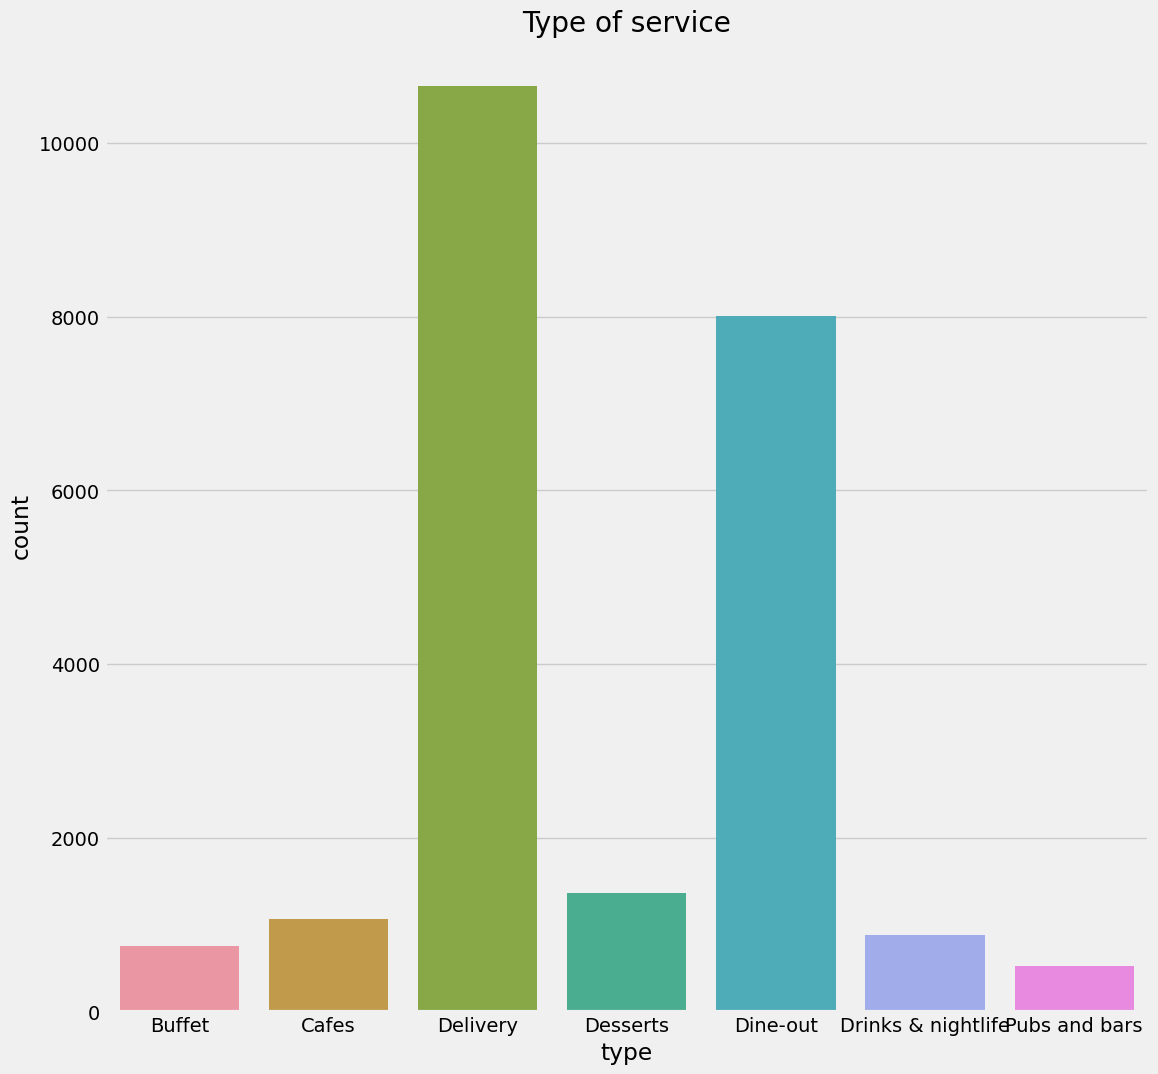

In [40]:
sns.countplot(x=df['type'])
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type of service')

👉 Here are two main services types are delivery and dine out.

* ## **Distribution of Cost of food for two peoples-**

In [41]:
from plotly.offline import iplot
trace0 = go.Box(y=df['cost'],name='accepting online orders',
                marker = dict(
            color = 'rgb(113,10,100)',        
            ))
data= [trace0]
layout = go.Layout(title='Box plot of approximate cost',width=800,height=800,yaxis=dict(title='Price'))
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

* ## **Distribution of charges-**

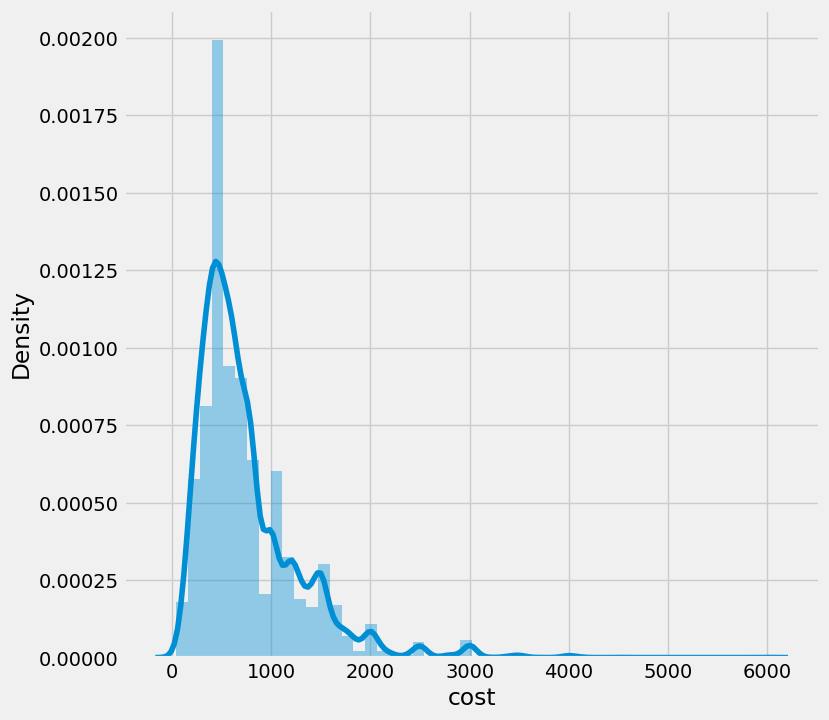

In [42]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.show()

* ## **Most Liked Dishes-**

In [43]:
import re

df.index = range(df.shape[0])
likes = []
for i in range (df.shape[0]):
  array_split = re.split(',',df['dish_liked'][i])
  for item in array_split:
    likes.append(item)

In [44]:
df.index = range(df.shape[0])
df.index

RangeIndex(start=0, stop=23248, step=1)

In [45]:
print("count of most liked dishes in banglore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

count of most liked dishes in banglore


 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
dtype: int64

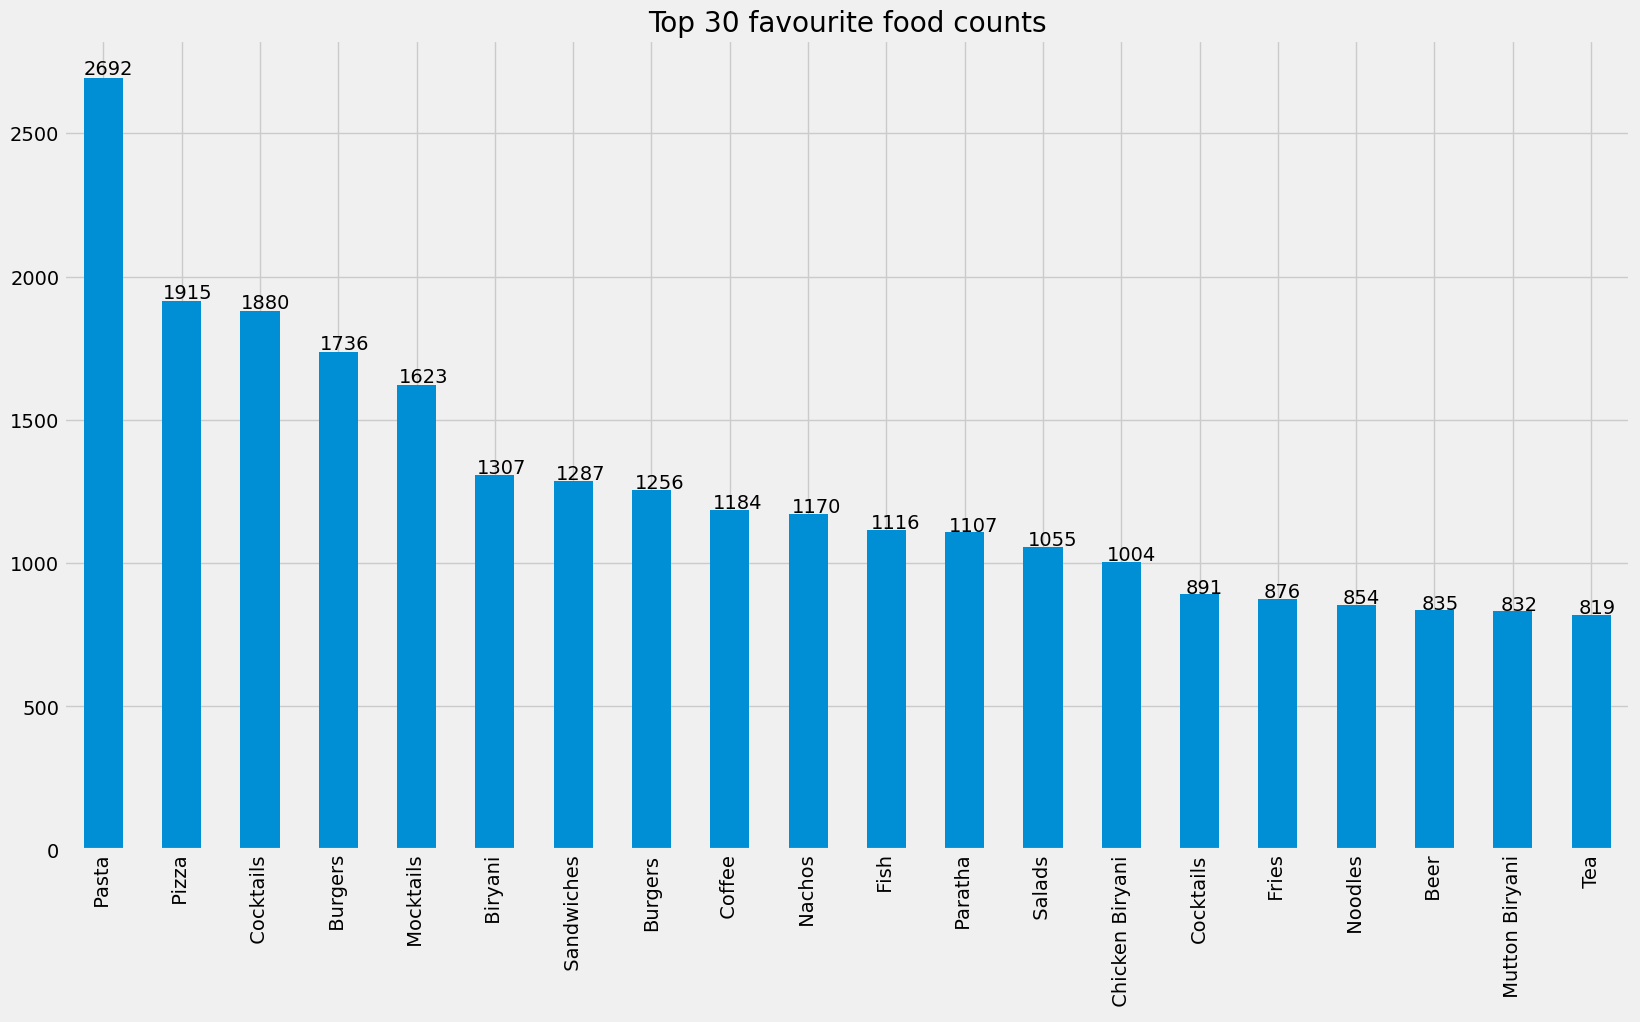

In [46]:
ax = favourite_food.nlargest(n=20,keep='first').plot(kind='bar',figsize=(18,10),title='Top 30 favourite food counts')
for i in ax.patches:
  ax.annotate(str(i.get_height()),(i.get_x() * 1.005,i.get_height() * 1.005))

👉 5 most liked dishes are **pasta, pizza, cocktails, burgers, mocktails.**

* ## **Restaurant and their counts-**

Text(0.5, 1.0, 'Restaurant')

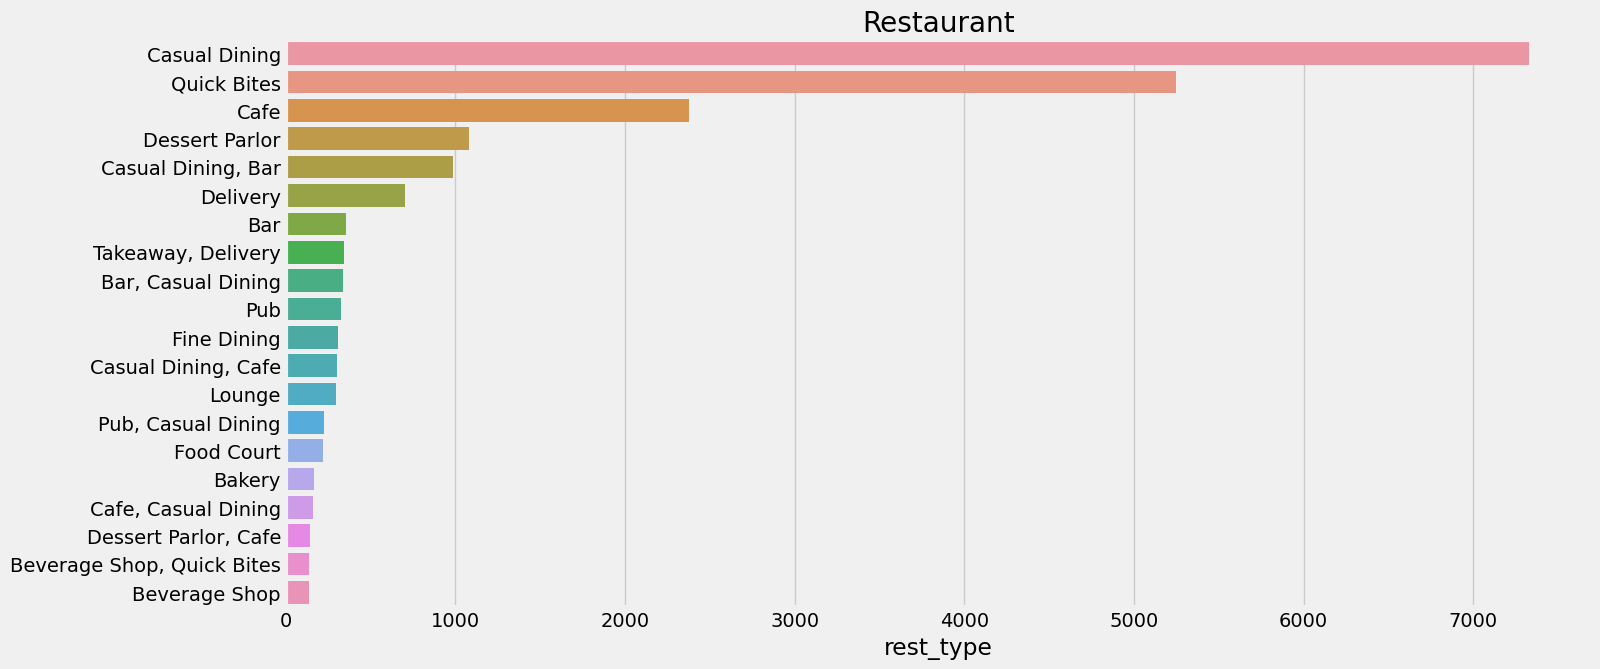

In [47]:
plt.figure(figsize=(15,7))
rest = df['rest_type'].value_counts()[:20]
sns.barplot(x=rest,y=rest.index)
plt.title('Restaurant')

👉 Casual dining,Quick bites,cafe are 3 most commomn types of restaurants in Banglore.



# **#Building Model-** 🔷

In [48]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


* ## **Convert the online categorical variables into numerical format**

In [49]:
df.online_order[df.online_order=='Yes'] = 1
df.online_order[df.online_order=='No'] = 0

In [50]:
df.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

* **1 - 16297 = Do offer online order**

* **0 - 6870 = Donot offer online order**

In [51]:
df.online_order = pd.to_numeric(df.online_order)

In [52]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


* ## **Change the string categorical into a categorical int-**

In [53]:
df.book_table[df.book_table=='Yes'] = 1
df.book_table[df.book_table=='No'] = 0

In [54]:
df.book_table = pd.to_numeric(df.book_table)

In [55]:
df.book_table.value_counts()

0    17191
1     6057
Name: book_table, dtype: int64

* **1 - 6057 = Restaurants do offer booking table**

* **0 - 17191 =  Restaurants donot offer book table**

* ## **Label Encode the categorical varibles to make it easier to build program.**

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [57]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item) 

In [58]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


In [59]:
my_data = df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('Zomato_df.csv')

In [60]:
X = df.iloc[:,[2,3,5,6,7,9,10,12]]
X.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [61]:
y = df['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23243    3.8
23244    3.9
23245    2.8
23246    2.5
23247    4.3
Name: rate, Length: 23248, dtype: float64

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

# **Linear Regression** 🟦

In [63]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [64]:
from sklearn.metrics import r2_score
y_pred = lr_model.predict(X_test)
r2_score(y_test,y_pred)

0.22818828522967072

# **Random_Forest** 🟦

In [65]:
from sklearn.ensemble import RandomForestRegressor
RF_Model = RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(X_train,y_train)
y_predict = RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.8809706960047533

# **Extratree Regressor** 🟦

In [66]:
# Preparing Extra Tree Regression
from sklearn.ensemble import ExtraTreesRegressor
ET_Model = ExtraTreesRegressor(n_estimators=120)
ET_Model.fit(X_train,y_train)
y_predict = ET_Model.predict(X_test)

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9338458460697496

👉 **Extra Tree Regressor gives us the best Model so we are using it for production**

# **Pickle File**-

**Using pickle to save our model so we can use it later.**

In [68]:
# Use pickle to save our model so we can use it later.
import pickle
# Saving model to disk
pickle.dump(ET_Model,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))